<a href="https://colab.research.google.com/github/VinicinBraga/Agricultural-Raw-Material-Project/blob/main/Agricultural_Raw_Material_ipymb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import required packages
import numpy as np
import pandas as pd

**Carregando o conjunto de dados em um quadro de dados usando Pandas**


In [ ]:
#@title
df=pd.read_csv('agricultural_raw_material.csv')

**Explorando o conjunto de dados**

In [ ]:
df.info
#Checking Null Values of each column
df.isnull().sum()

**Lidar com dados ausentes, incorretos e inválidos**

In [9]:
# Replacing %, "," and "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)
# Dropping rows with NaN values
df = df.dropna()
# Check to see if all NaN values are resolved
df.isnull().sum()
# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [10]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


**Colunas de data e horacolunas**

In [ ]:
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexing month
df = df.set_index('Month')

In [ ]:
df.head()

Análise Exploratória e Visualização
Vamos começar importando **matplotlib.pyplot e seaborn**.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Mapa de calor**

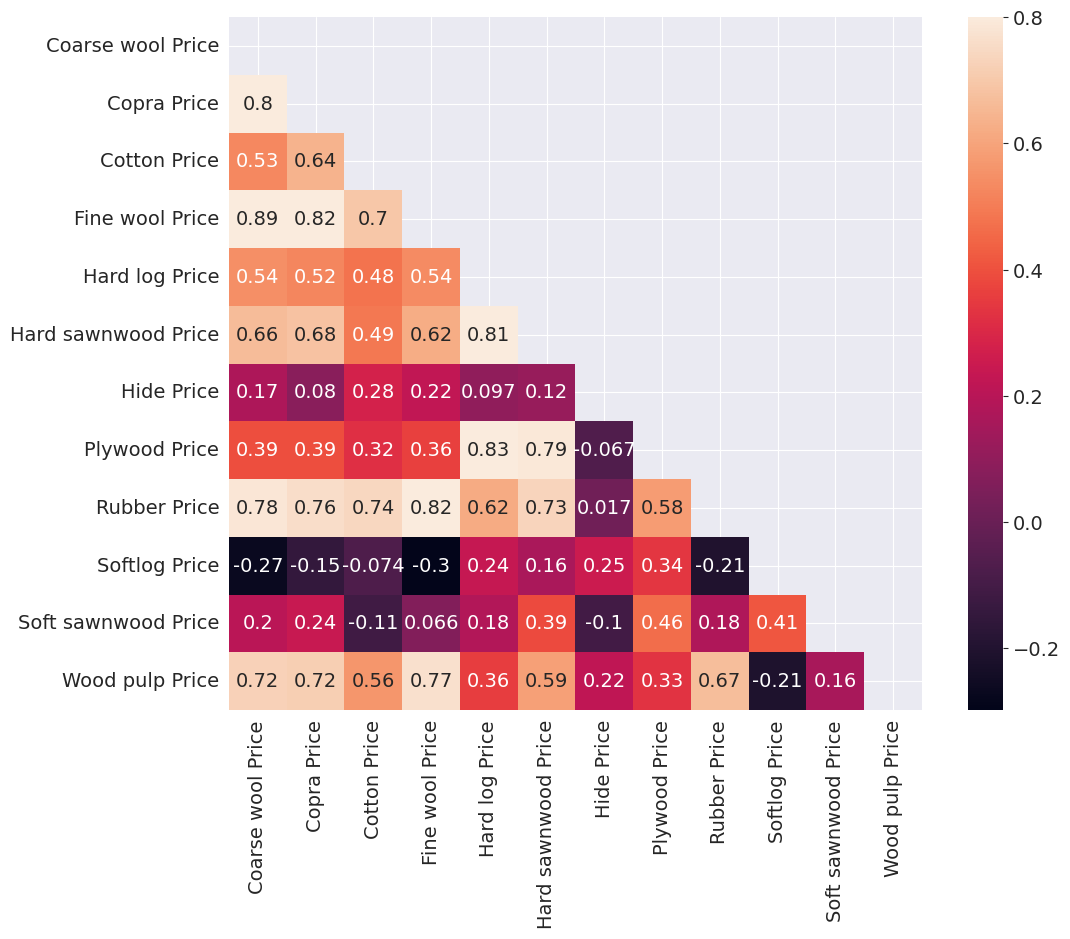

In [13]:
#raw-materials list
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#getting the correlation matrix
corrmat = df[raw_data].corr()
#setting the size of plot
fig = plt.figure(figsize = (12, 9))
#masking the upper traingle part since matrix is symmetric(repetitive)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

O **Mapa de Calor** mostra a correlação entre as matérias-primas, onde quanto maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas, mas não necessariamente

Explore uma ou mais colunas traçando um gráfico abaixo e adicione alguma explicação sobre ele Matriz de correlação

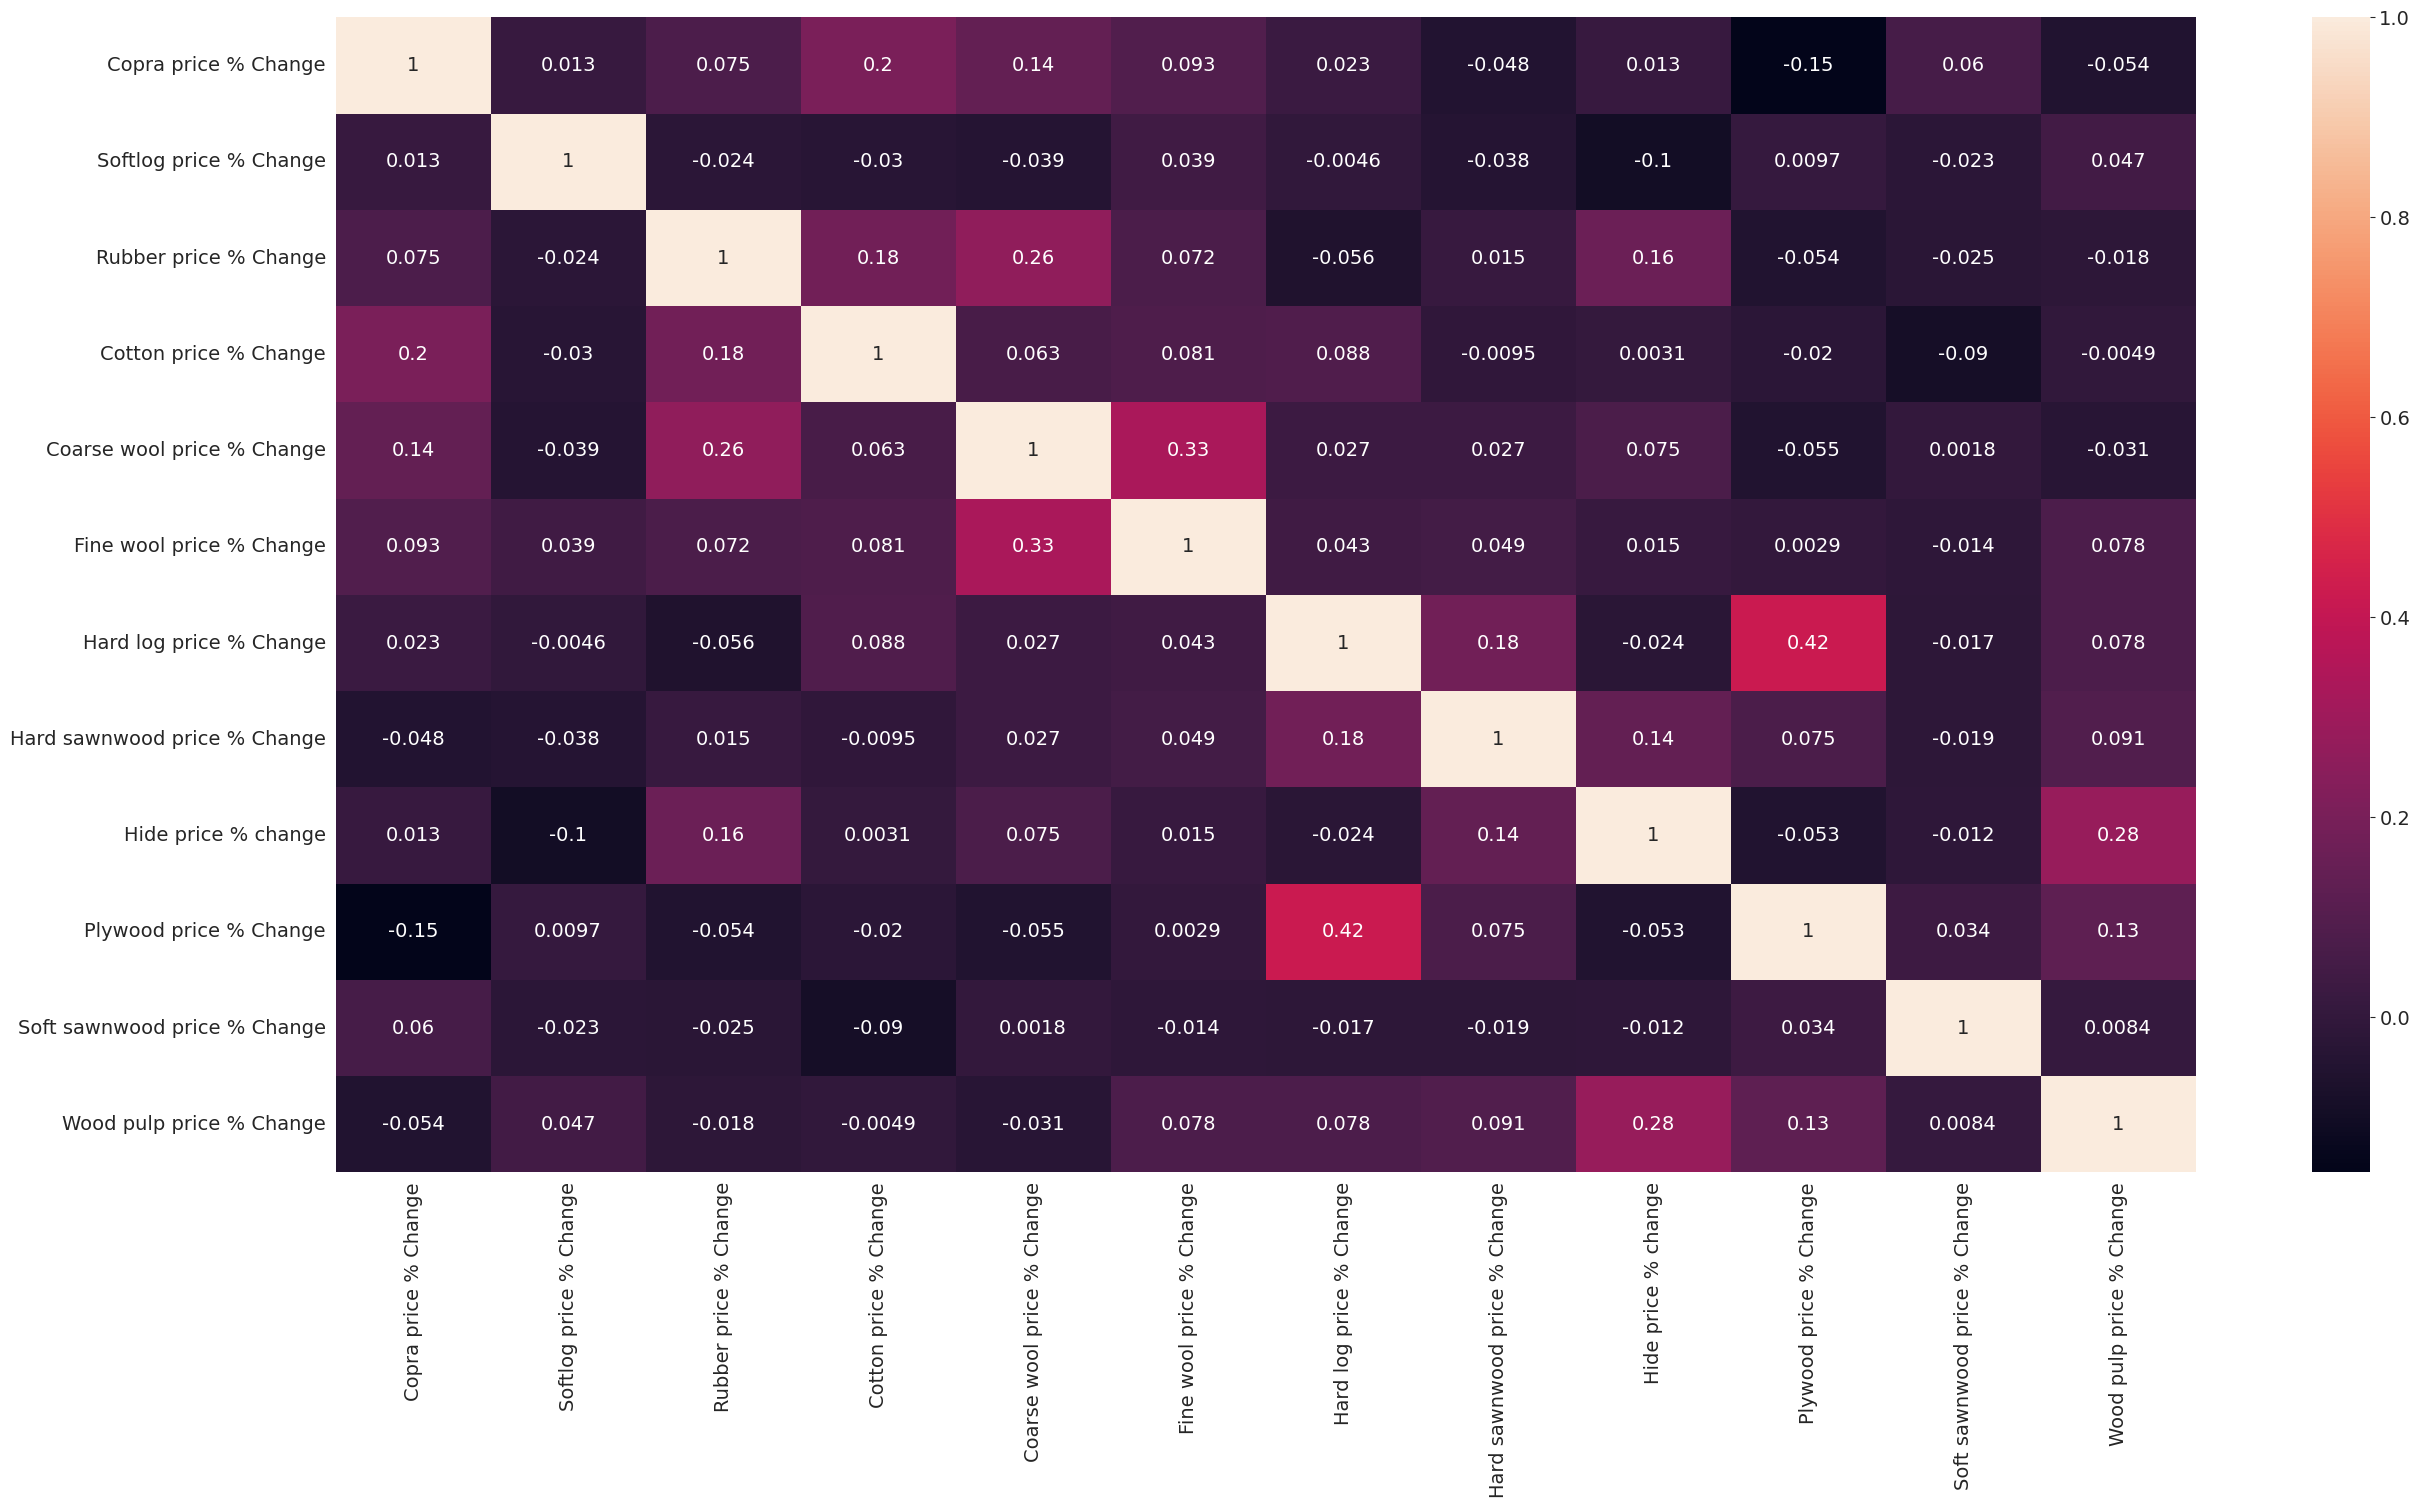

In [14]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas

* o valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
* Zero implica nenhuma relação
* caso contrário, maior o valor maior a chance de relação.
preços e seus gráficos de % de mudança

# **Lã grossa**

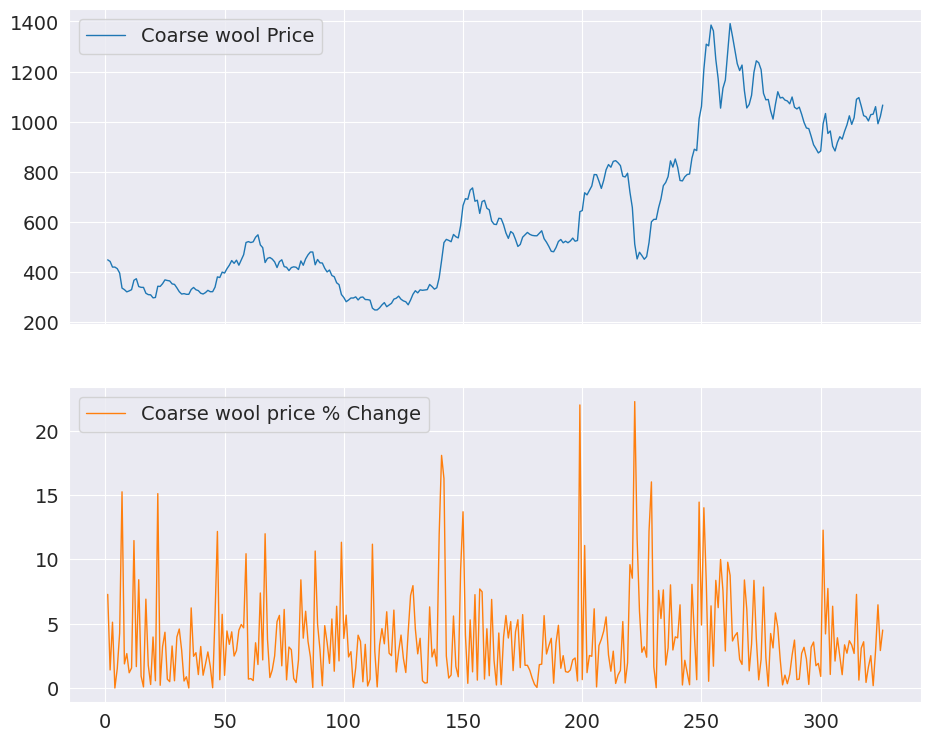

In [15]:
axes=df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

Da mesma forma, podemos encontrar a visualização de todos os outros recursos fornecidos no conjunto de dados.

##Fazendo e respondendo perguntas##
**Q1: Descubra a variação normal do preço de cada matéria-prima**

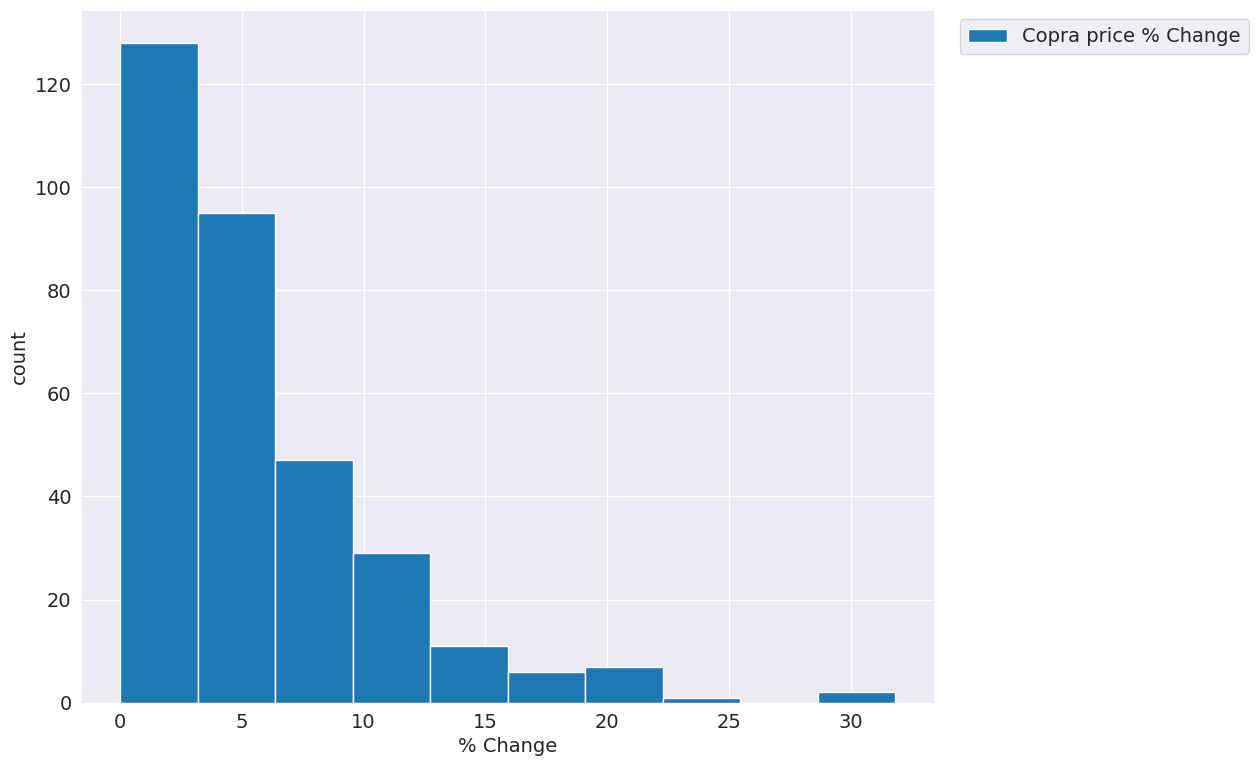

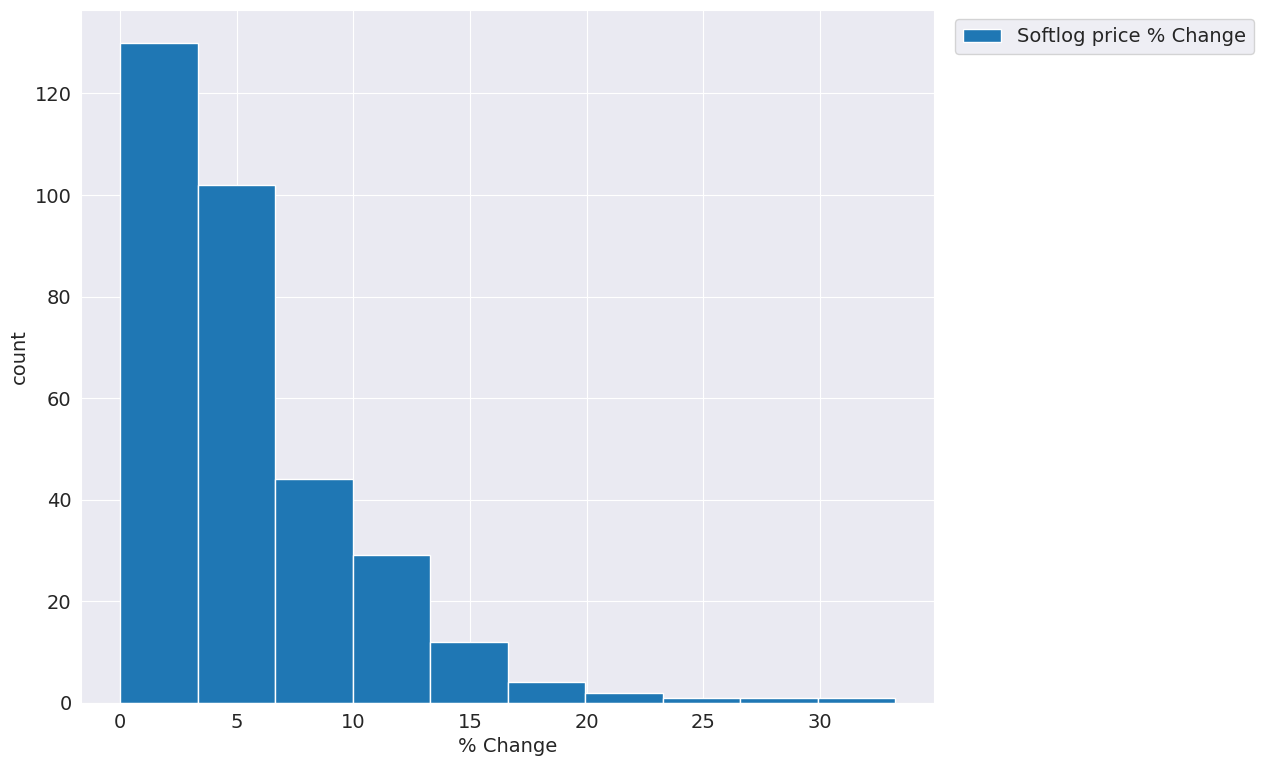

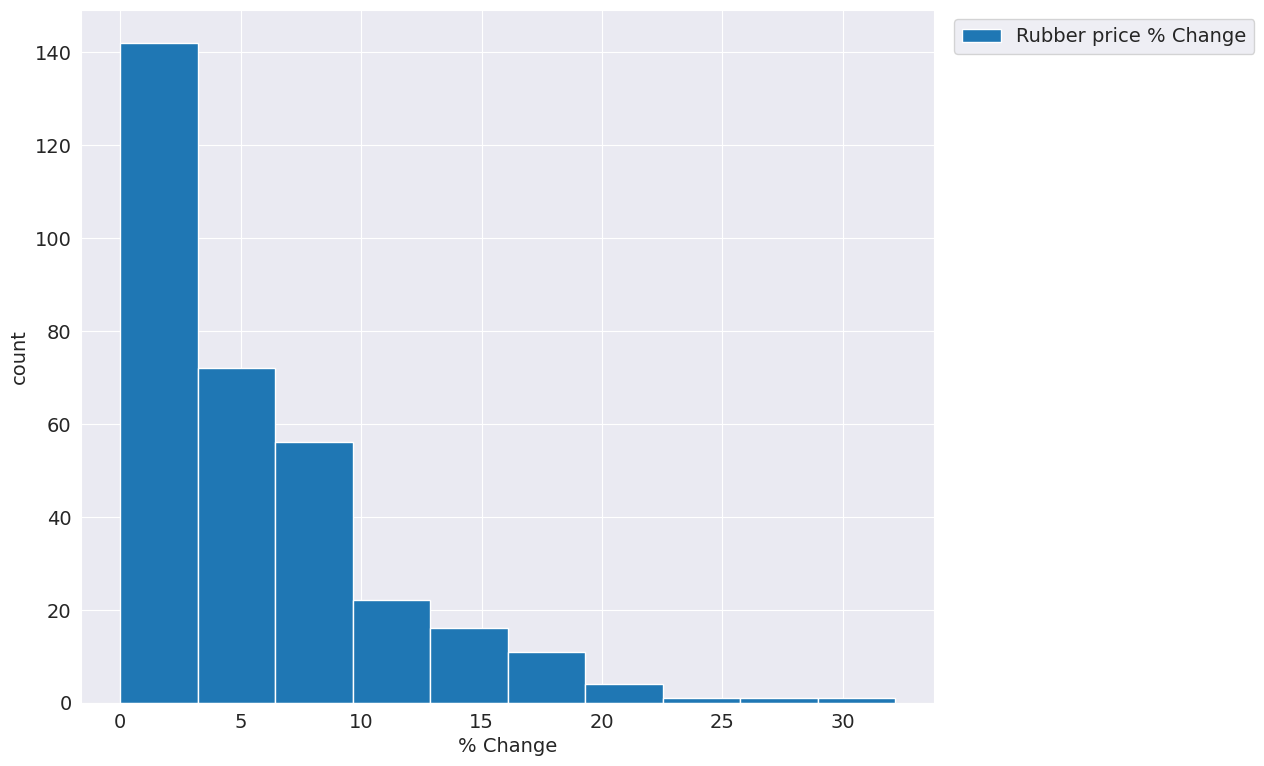

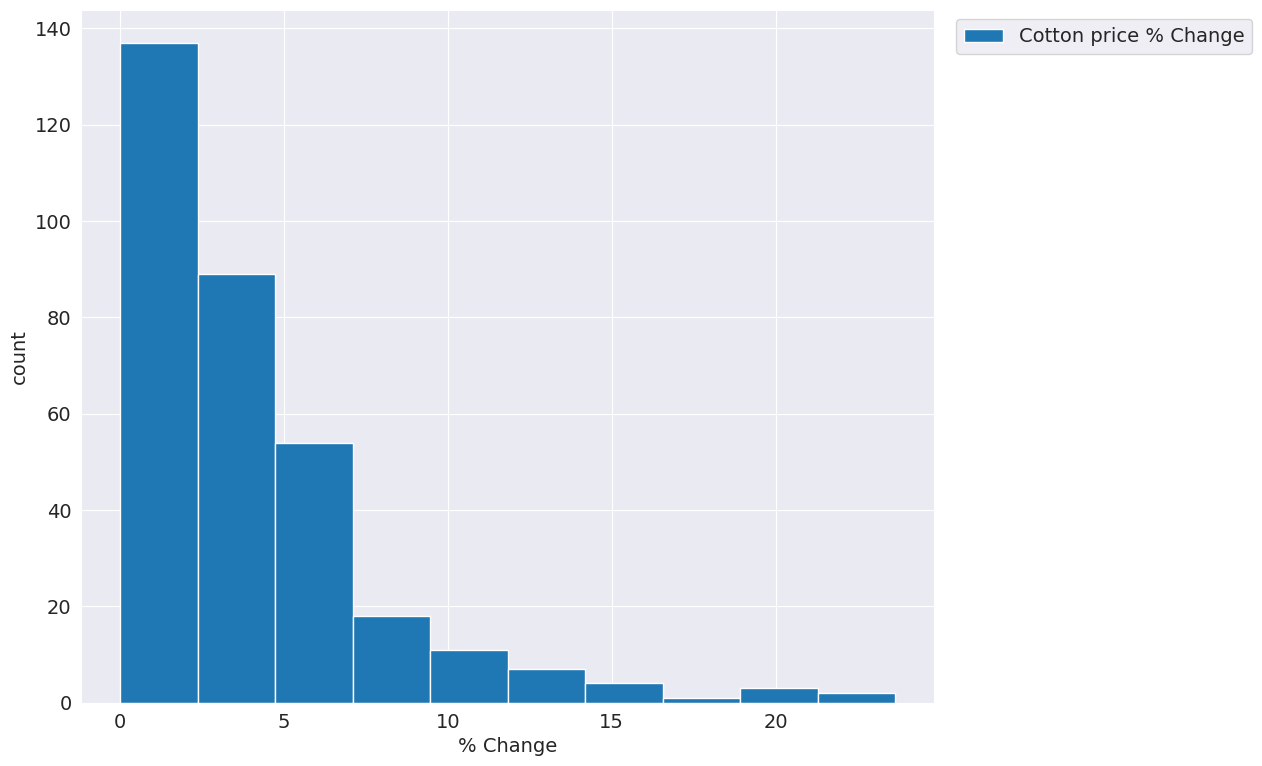

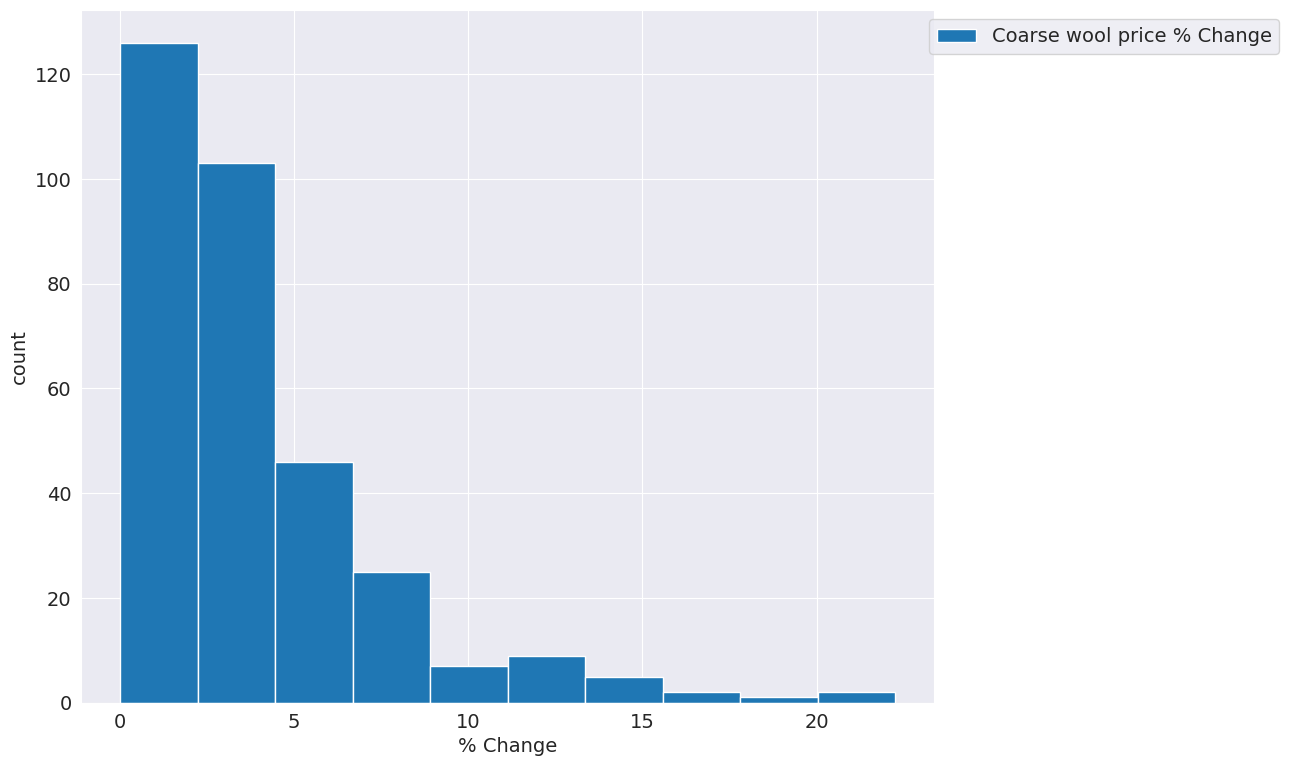

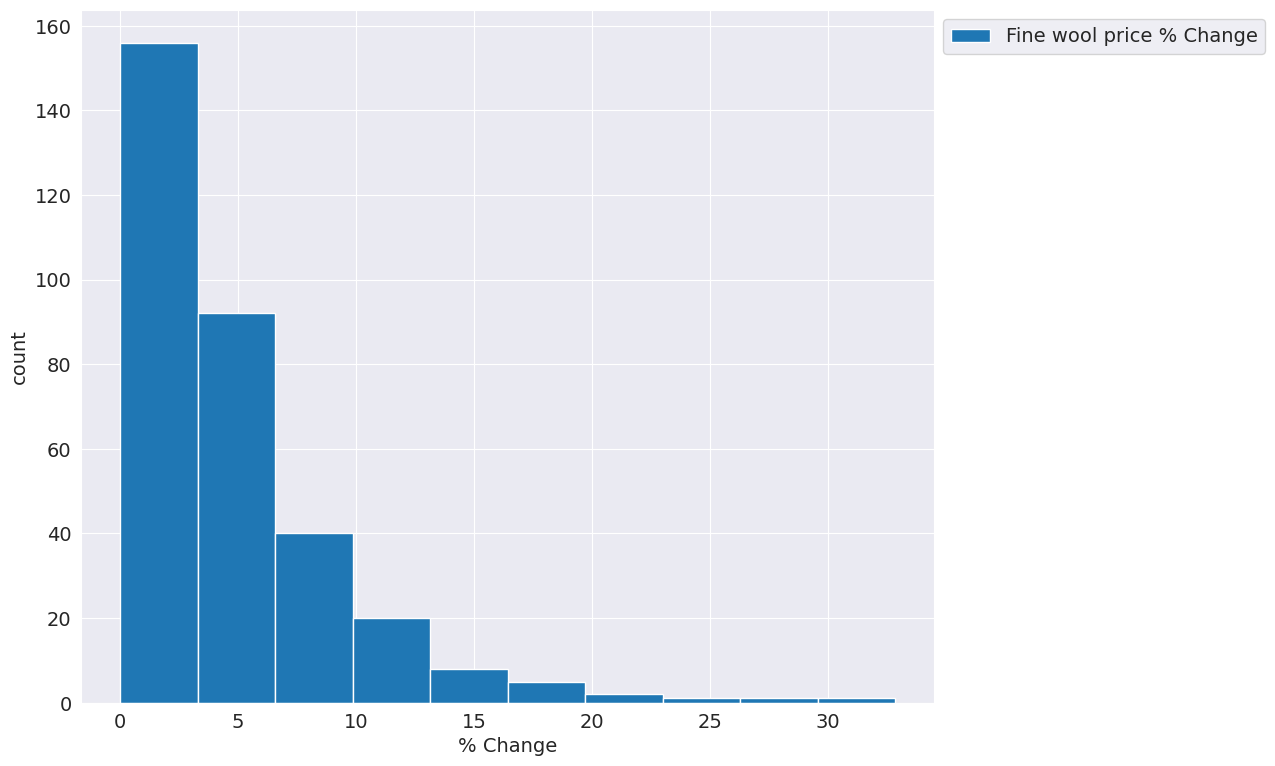

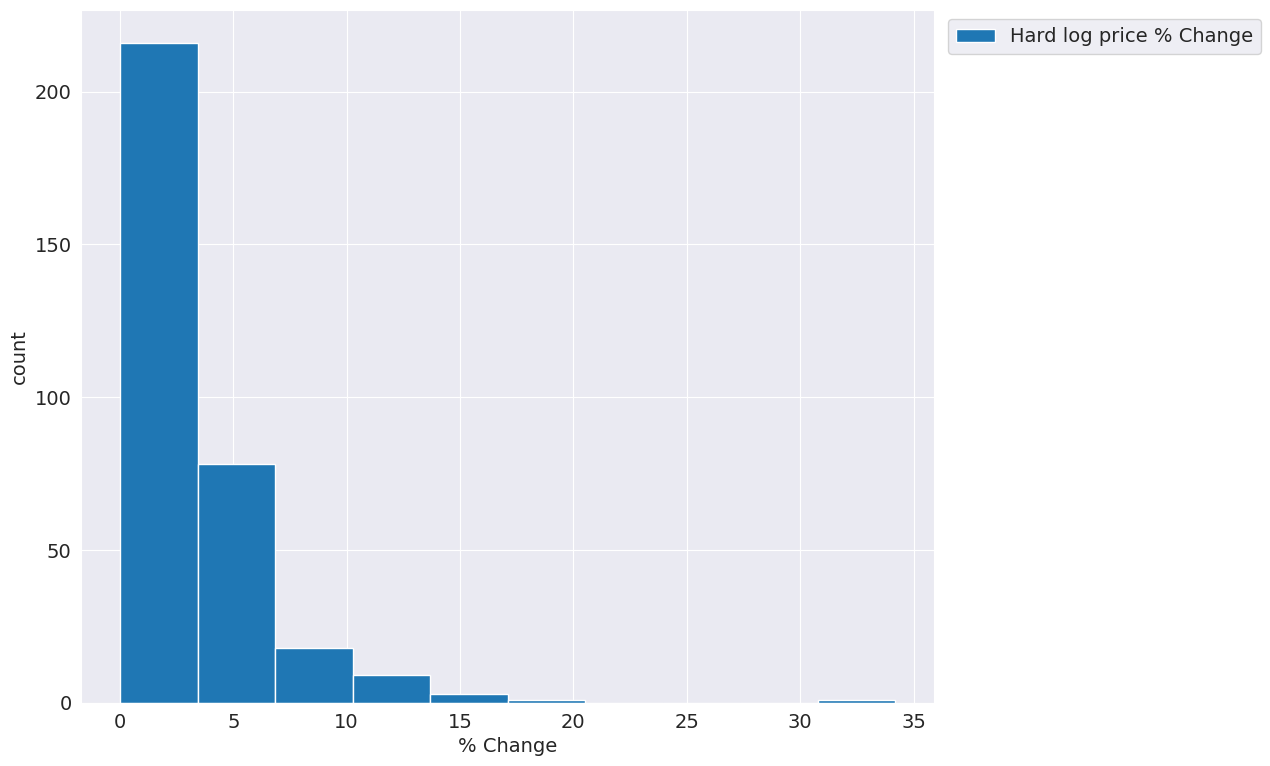

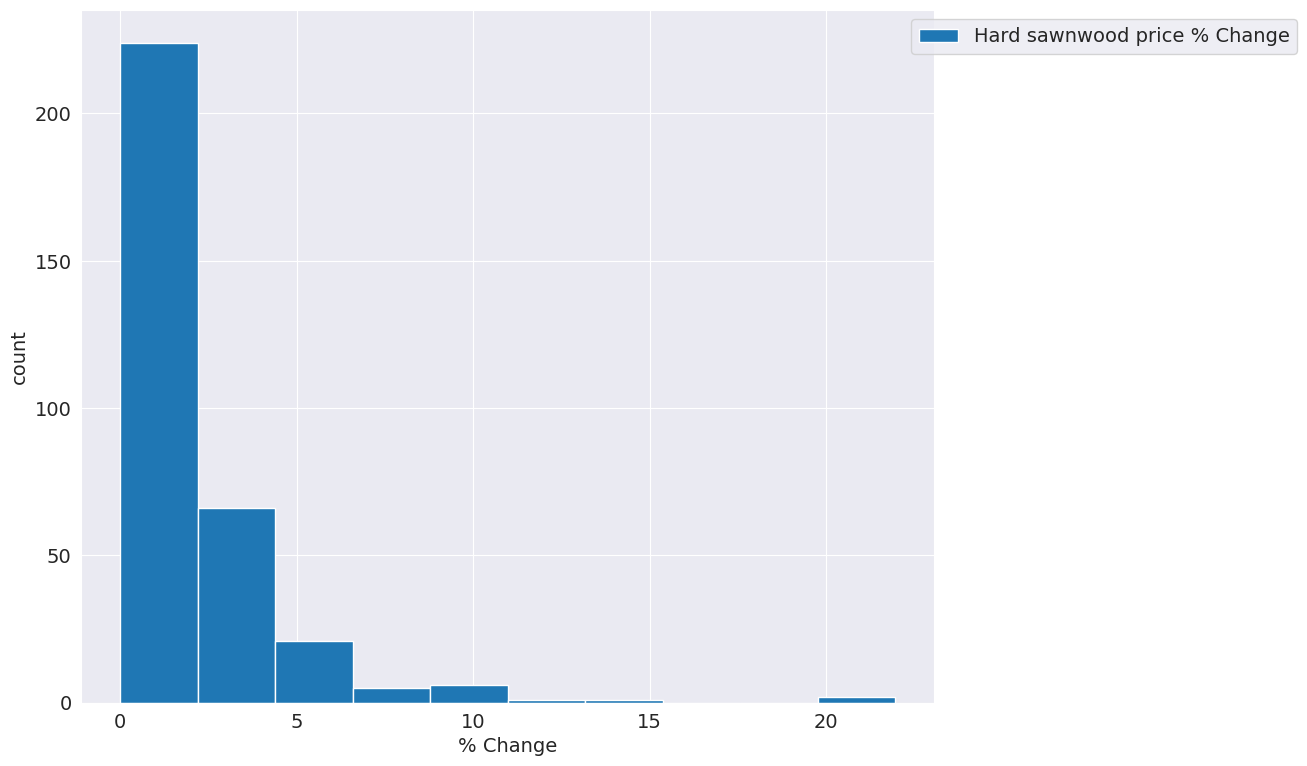

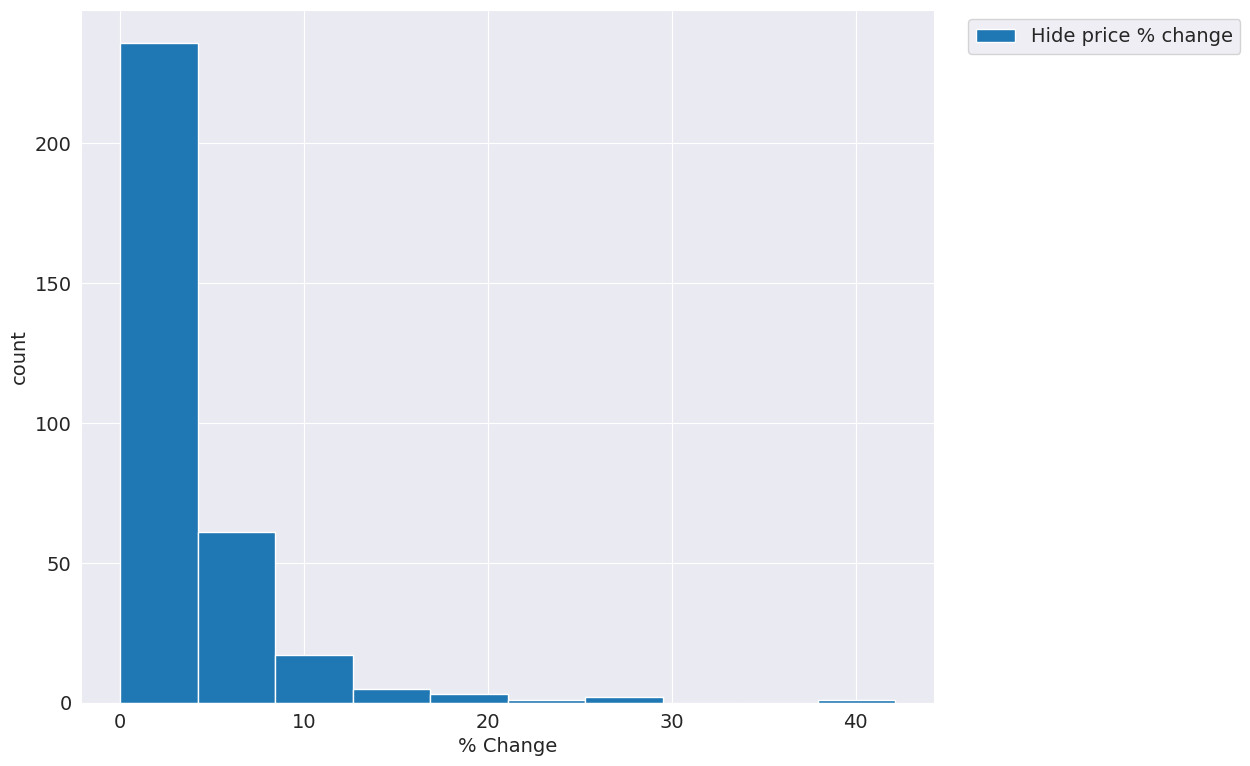

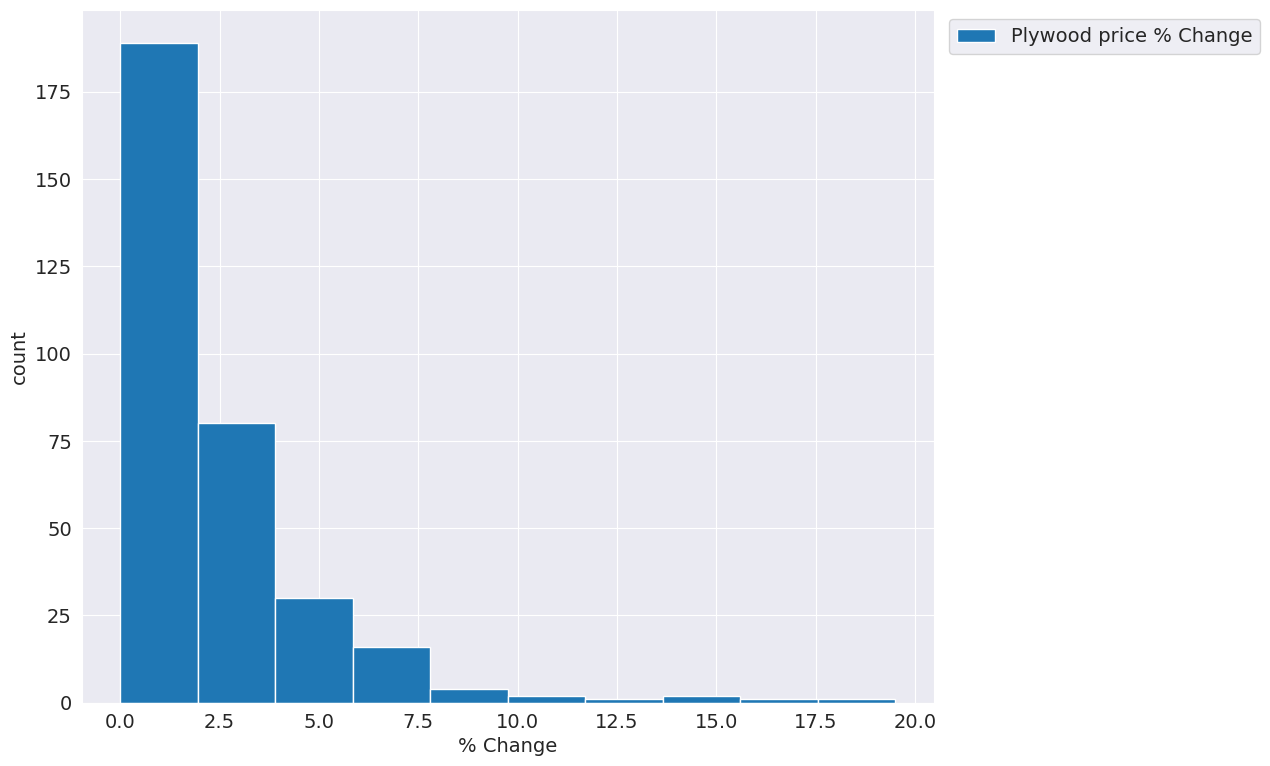

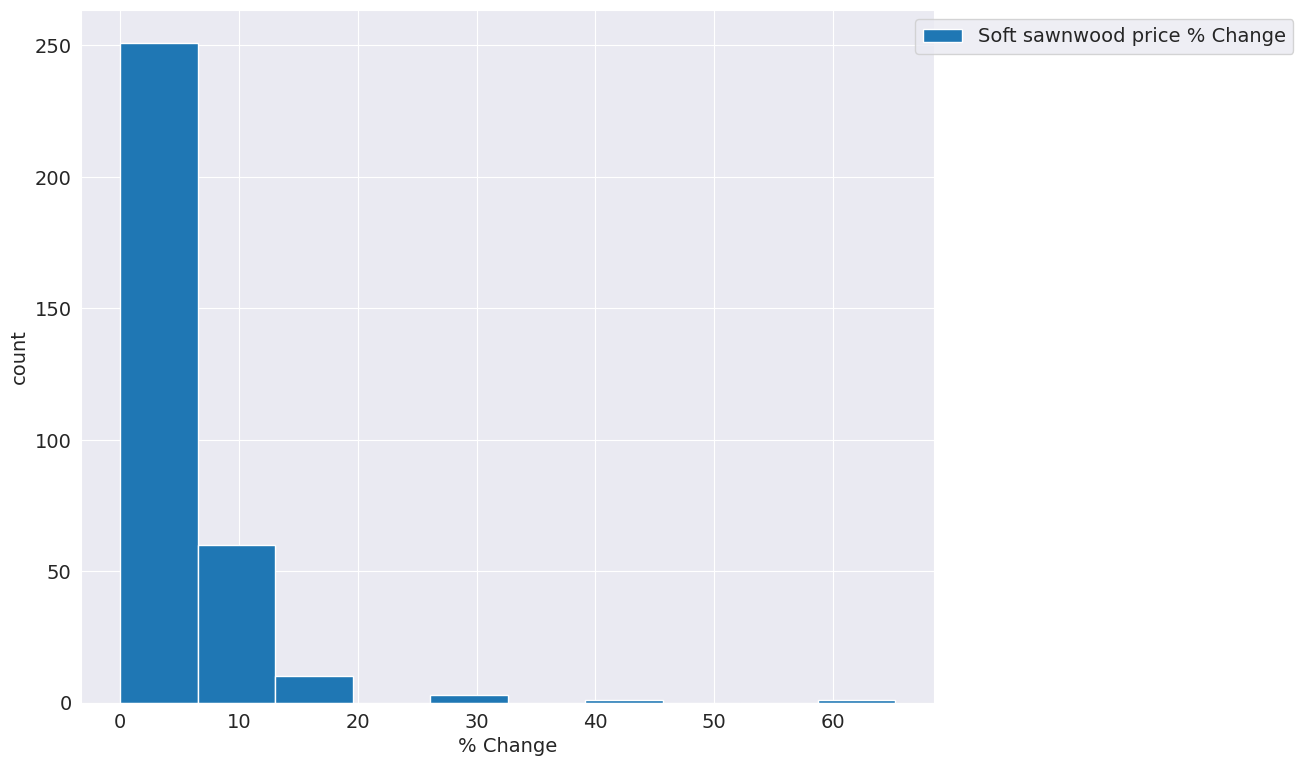

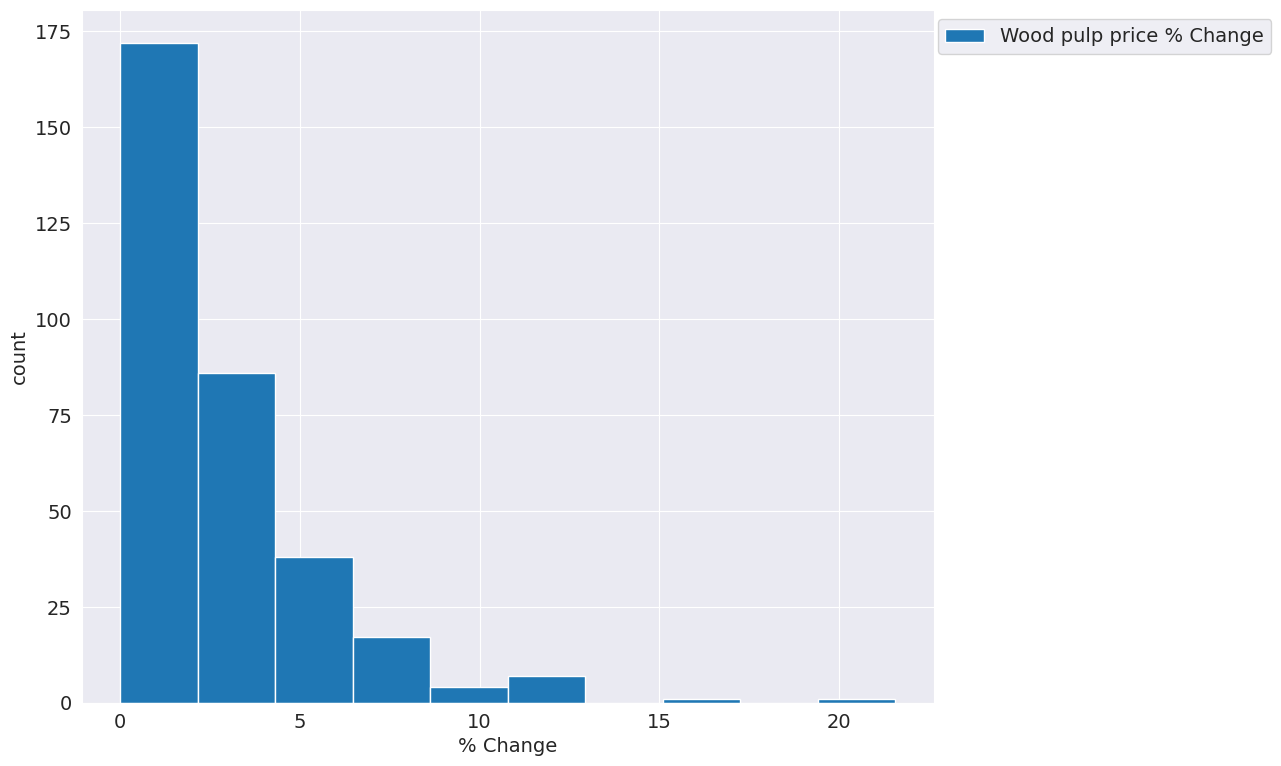

In [16]:
#df[["Wood pulp Price", "Wood pulp price % Change"]].hist(figsize=(11, 9), linewidth=1)

changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))


**Podemos** observar que a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%

**Q2: Encontre a matéria-prima que tem o menor preço ao longo dos anos**

Text(0.5, 0.98, 'Raw-Materials price comparision')

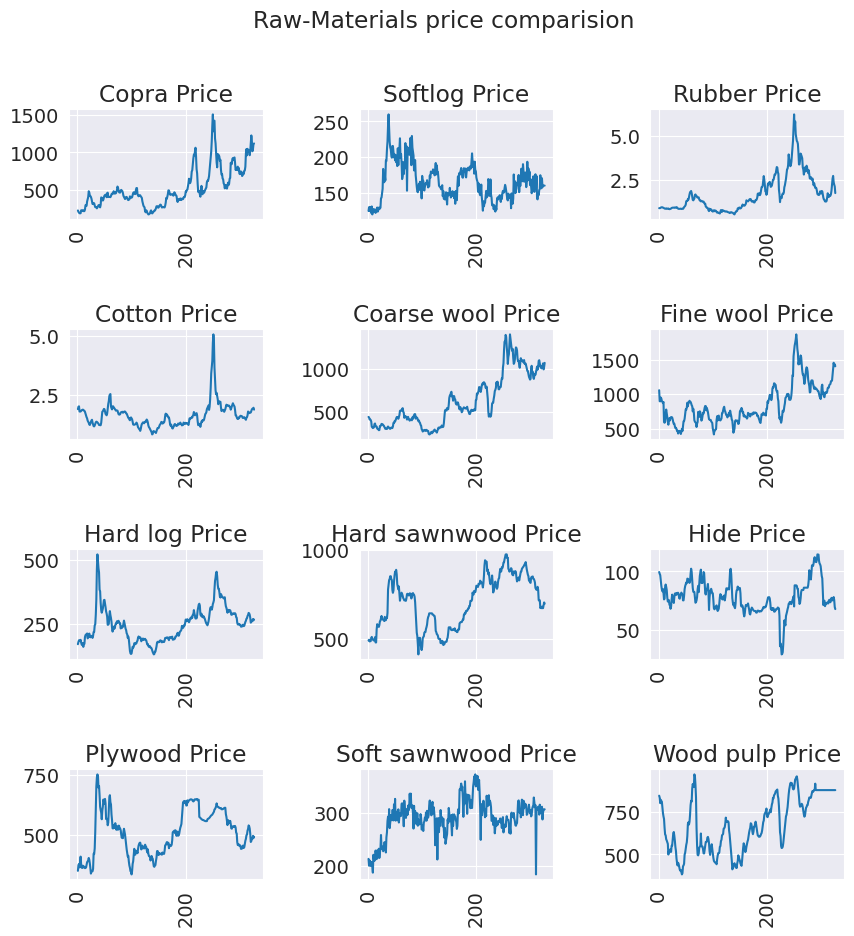

In [17]:
plt.figure(figsize=(10, 10))
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")


Podemos ver que o algodão e a borracha são de preços mais baixos vamos comparar preços para entender melhor qual é o mais baixo

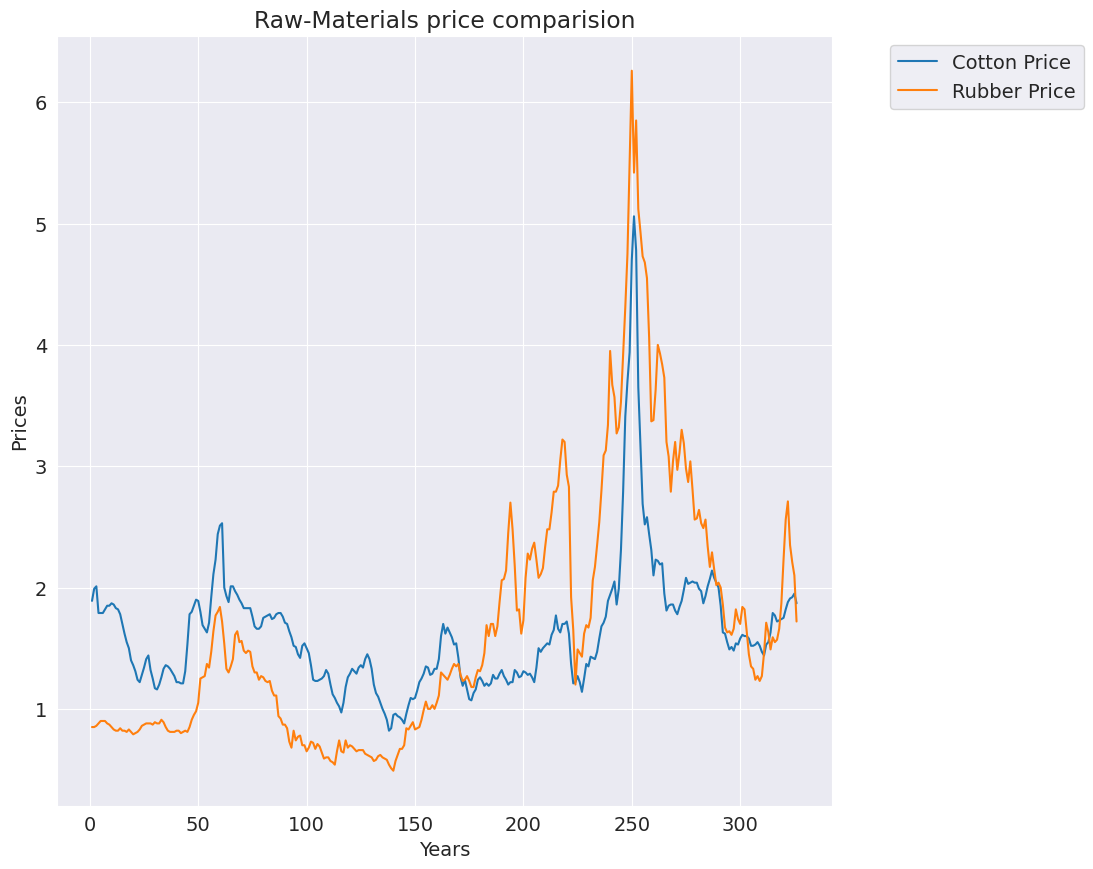

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

**Algodão** é matéria-prima de menor preço nos últimos anos

Tanto o algodão quanto a borracha são materiais de baixo preço

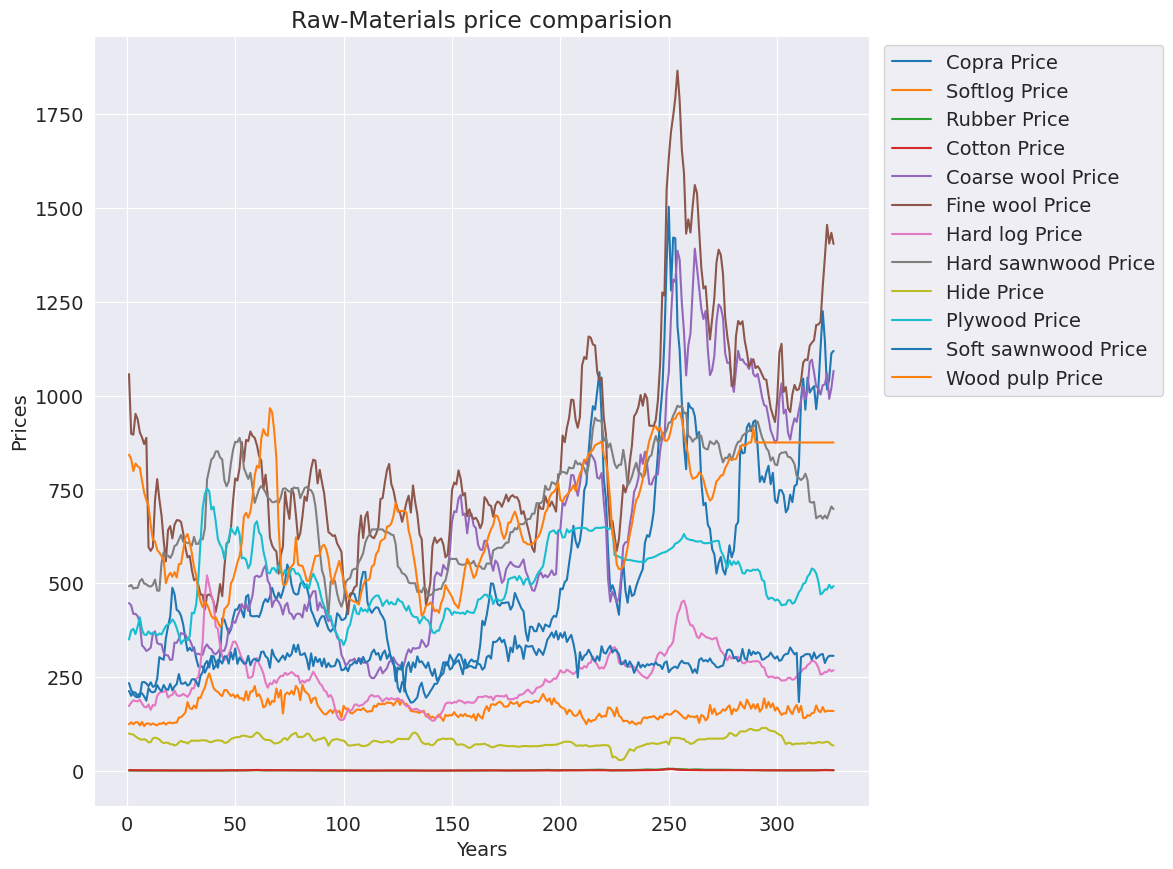

In [19]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))

A partir dos gráficos pudemos analisar as matérias-primas em tipos de acordo com seu preço ao longo dos anos

materiais de baixo preço

-algodão, couro, softlog, log duro, preço de madeira serrada macia, borracha

Materiais de alto preço

-lã grossa,copra,lã fina,madeira serrada dura,pasta de madeira,madeira compensada

**Q3: qual matéria-prima tem a maior e menor variação de % de preço**

In [20]:
import random as random

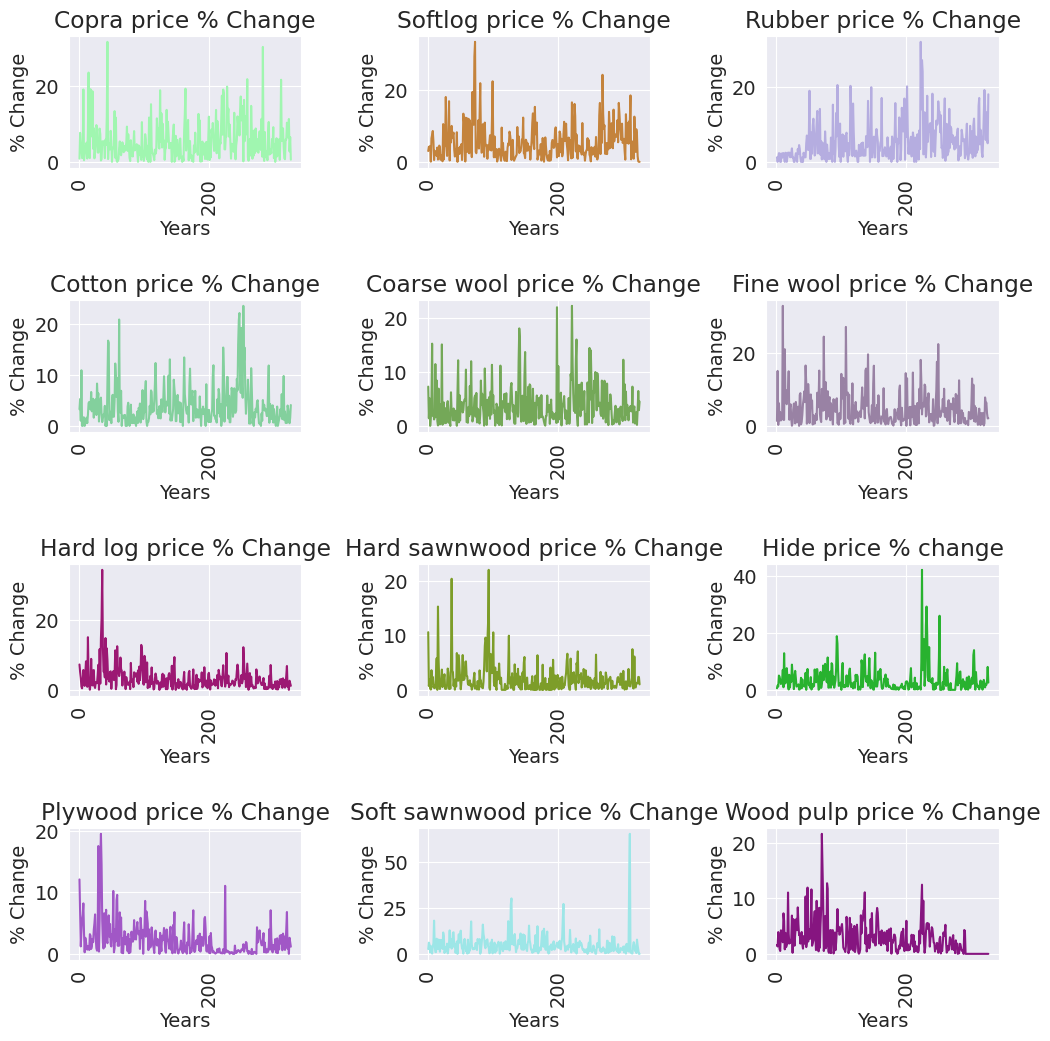

In [21]:
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
for i in range(len(changelist)):

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[changelist[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')
    #plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

Podemos ver a maior % de mudança em mais de 60 para madeira serrada macia e a menor % de mudança é para madeira compensada em menos de 20

**Q4: Encontre as matérias-primas com mudança drástica de preço**

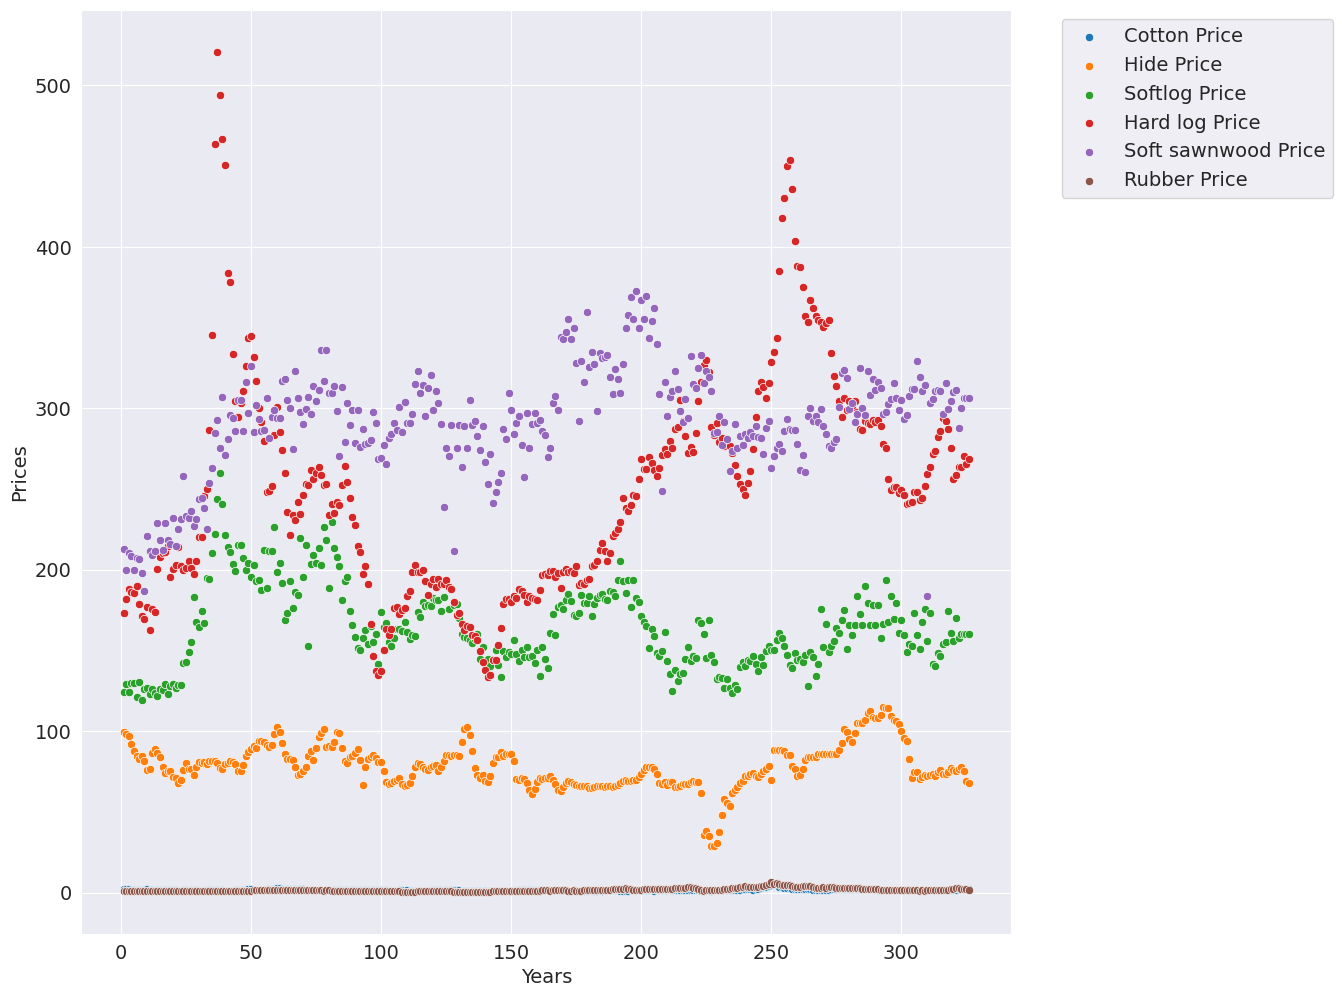

In [22]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
#plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]],x=df.index);
    plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))

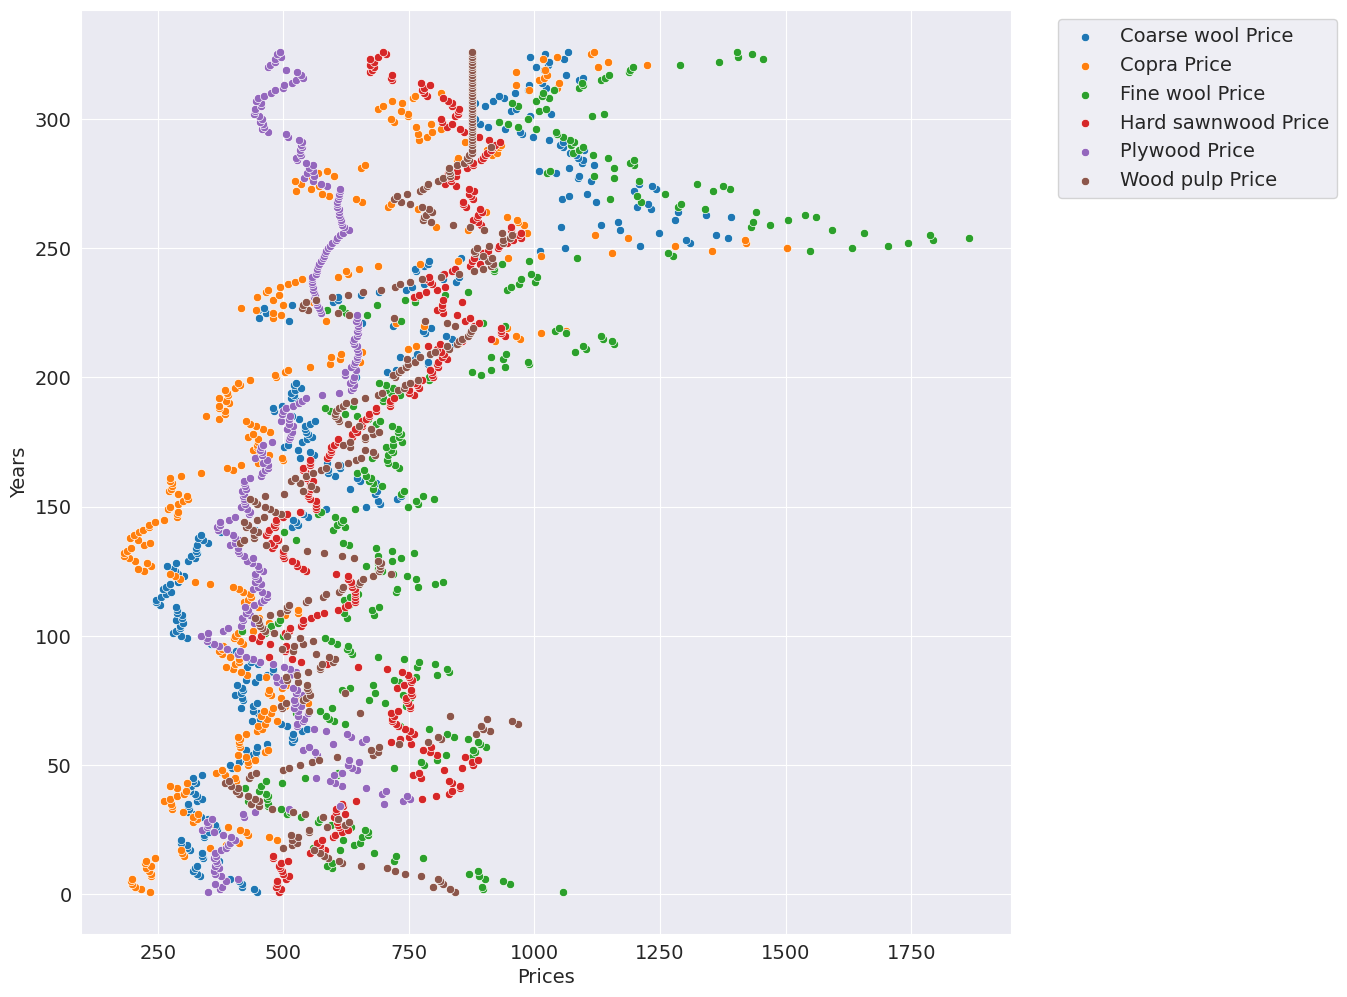

In [23]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
#lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Plywood Price']
highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))

A mudança de preço é drástica para o preço de tora dura entre materiais de baixa faixa de preço e entre materiais de alto preço, são os preços de lã fina

**Q5: Descobrir a faixa de preço de matérias-primas de baixo preço**

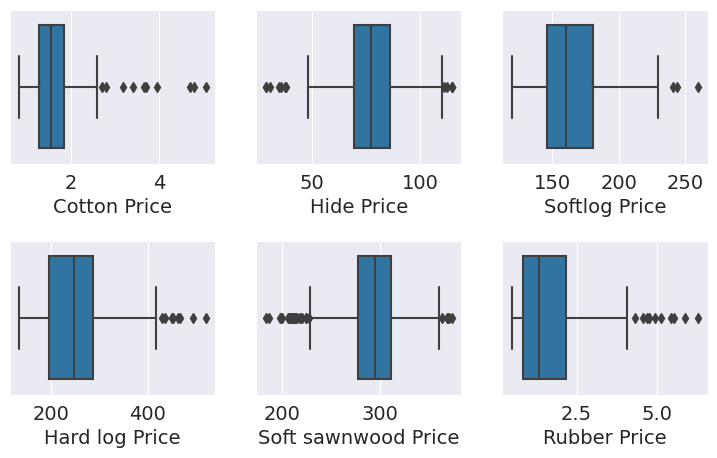

In [24]:
#plt.figure(figsize=(10, 10))
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(lowlist[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])

Inclui: O intervalo interquartil está entre Q3 e Q1 mínimo, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e máximo e outliers


##Inferências e Conclusão##
* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
* alta e baixa % de variação dos materiais
* Pudemos identificar a variação de preços ao longo dos anos.
* Correlação entre eles usando um mapa de calor

##Trabalho futuro##
*  Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.
*  Também pudemos prever os preços das matérias-primas analisando os anos anteriores

* Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.